  #                             Travelling salesman Problem

In [1]:

import numpy as np, random, operator
import matplotlib.pyplot as plt
import math
import pandas as pd

### Generating data

In [2]:
def distance_between_cities(cities):
    data = dict()
    for index, value in enumerate(cities):
        x1 = cities[index][0]
        y1 = cities[index][1]
        if index + 1 <= len(cities)-1:
            x2 = cities[index+1][0]
            y2 = cities[index+1][1]
            xdiff = x2 - x1
            ydiff = y2 - y1
            dst = (xdiff*xdiff + ydiff*ydiff)** 0.5
            data['Distance from city '+ str(index+1) +' to city ' + str(index+2)] = dst 
        elif index + 1 > len(cities)-1:
            x2 = cities[0][0]
            y2 = cities[0][1]
            xdiff = x2 - x1
            ydiff = y2 - y1
            dst = (xdiff*xdiff + ydiff*ydiff)** 0.5
            data['Distance from city '+ str(index+1) + ' to city ' + str(index +2 -len(cities))] = dst
              
    return data

In [3]:
cityList  = [[77.580643,12.972442],[72.88261,19.07283],[77.216721,28.644800],[73.856255,18.516726]
             ,[85.158875,25.612677],[80.9231262,26.8392792],[74.797371,34.083656]]    
val = distance_between_cities(cityList).values()

In [4]:
print(val)

dict_values([7.699756348069267, 10.507479614123506, 10.6710175094333, 13.345476366874312, 4.409775601291549, 9.487142456541129, 21.2938948898453])


In [5]:
def total_distance(cities):
    total = sum(distance_between_cities(cities).values())
    return total
total_distance(cityList)

77.41454278617837

In [6]:
def generatePath(cities):
    path = random.sample(cities, len(cities))
    return path
list= generatePath(cityList)
print(list)

[[77.216721, 28.6448], [72.88261, 19.07283], [74.797371, 34.083656], [73.856255, 18.516726], [85.158875, 25.612677], [80.9231262, 26.8392792], [77.580643, 12.972442]]


In [7]:
import numpy as np
city_names = ['Bangalore', 'Mumbai', 'Delhi', 'Pune','Patna','Lucknow','Kashmir']
def plot_pop(cities):
    plt.figure(figsize=(20,10))
    x = [i[0] for i in cities]
    y = [i[1] for i in cities]
    x1=[x[0],x[-1]]
    y1=[y[0],y[-1]]
    plt.plot(x, y, 'b', x1, y1, 'b')
    plt.scatter (x, y)
    j =[77.580643, 72.88261, 77.216721, 73.856255,85.158875,80.9231262,74.797371]
    k = [12.972442, 19.07283, 28.644800, 18.516726,25.612677,26.8392792,34.083656]
   
    
    for i, txt in enumerate(city_names):
        plt.annotate(txt, (j[i], k[i]),horizontalalignment='center', 
            #verticalalignment='bottom',
                    )
    plt.show()
    return

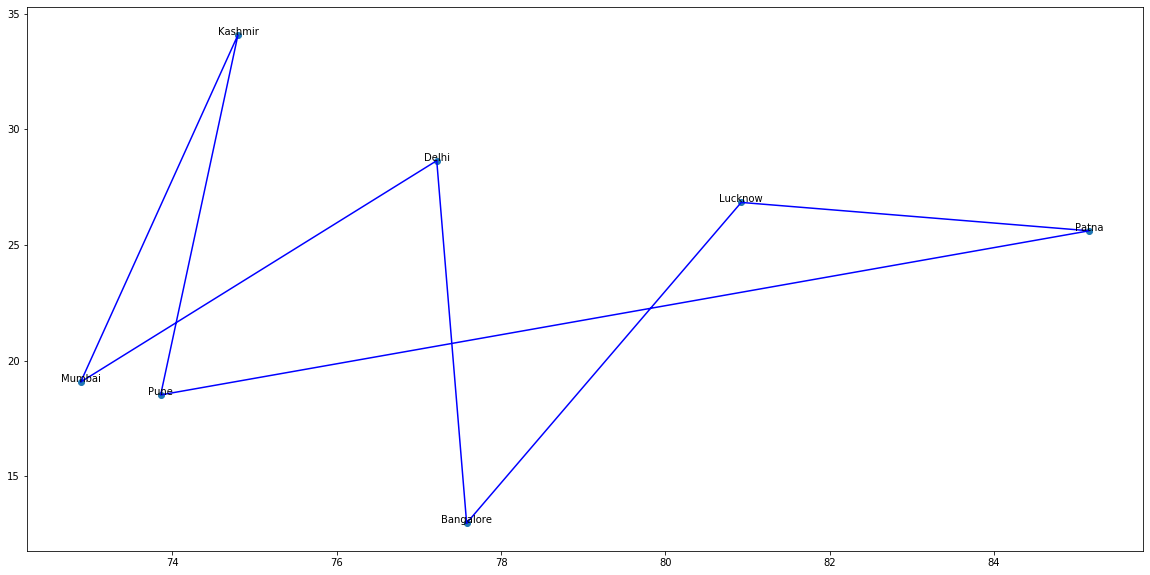

In [8]:
plot_pop(list)

In [28]:
def initialPopulation(cities, populationSize):
    population = [generatePath(cities) for i in range(0, populationSize)]
    return population
population = initialPopulation(cityList,10)

In [29]:
for idx, pop_plot in enumerate (population):
    print('Initial Population '+ str(idx),pop_plot)

Initial Population 0 [[77.580643, 12.972442], [77.216721, 28.6448], [72.88261, 19.07283], [80.9231262, 26.8392792], [74.797371, 34.083656], [73.856255, 18.516726], [85.158875, 25.612677]]
Initial Population 1 [[74.797371, 34.083656], [80.9231262, 26.8392792], [72.88261, 19.07283], [77.216721, 28.6448], [77.580643, 12.972442], [73.856255, 18.516726], [85.158875, 25.612677]]
Initial Population 2 [[73.856255, 18.516726], [72.88261, 19.07283], [80.9231262, 26.8392792], [85.158875, 25.612677], [74.797371, 34.083656], [77.580643, 12.972442], [77.216721, 28.6448]]
Initial Population 3 [[74.797371, 34.083656], [77.216721, 28.6448], [72.88261, 19.07283], [85.158875, 25.612677], [77.580643, 12.972442], [73.856255, 18.516726], [80.9231262, 26.8392792]]
Initial Population 4 [[80.9231262, 26.8392792], [77.216721, 28.6448], [85.158875, 25.612677], [73.856255, 18.516726], [74.797371, 34.083656], [77.580643, 12.972442], [72.88261, 19.07283]]
Initial Population 5 [[80.9231262, 26.8392792], [85.158875, 

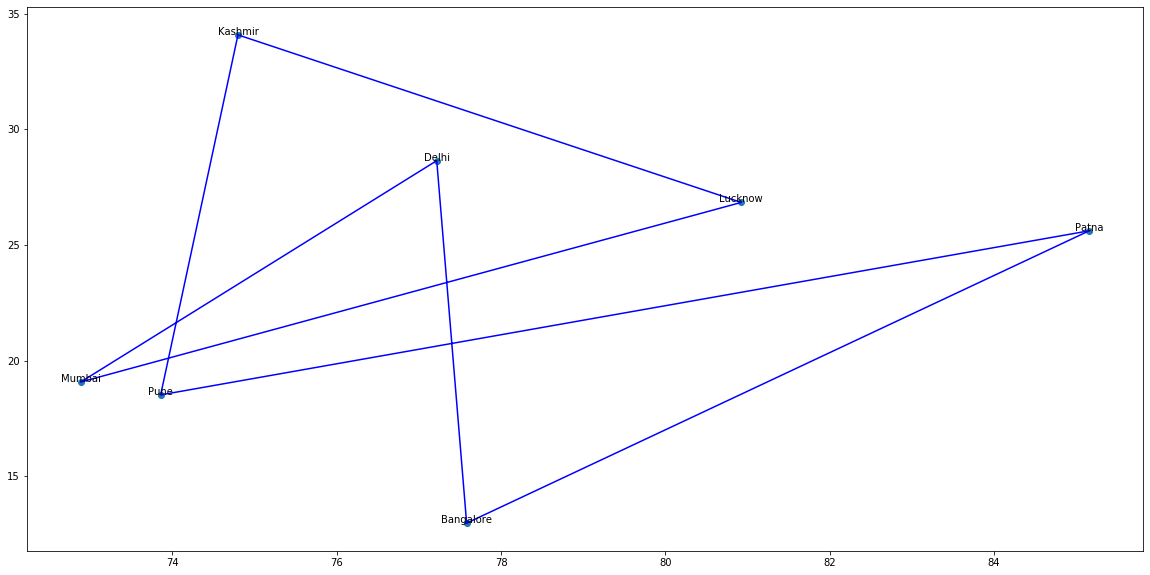

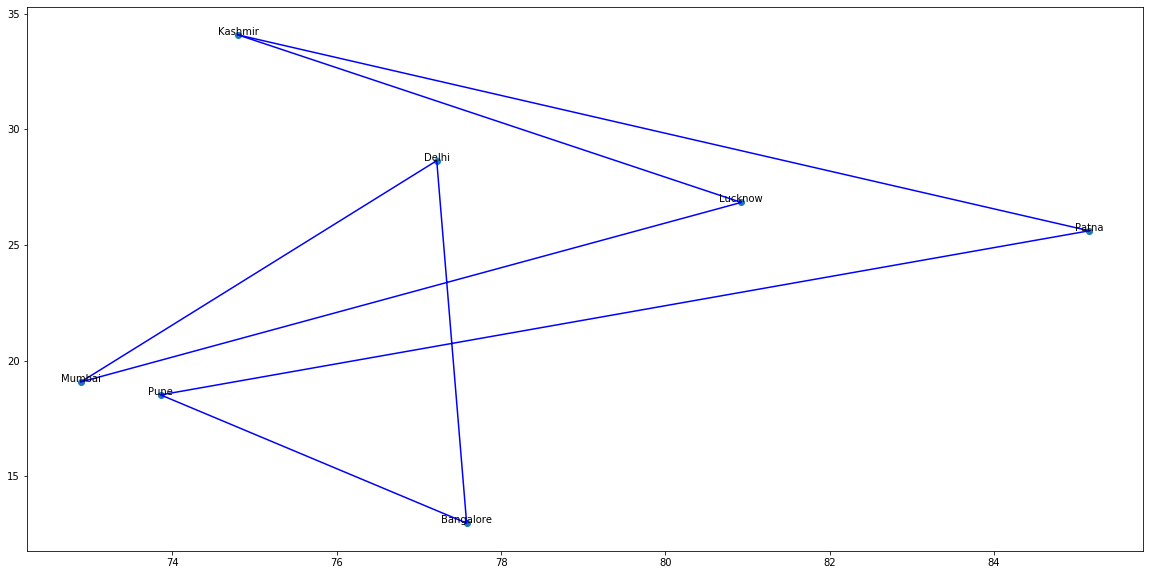

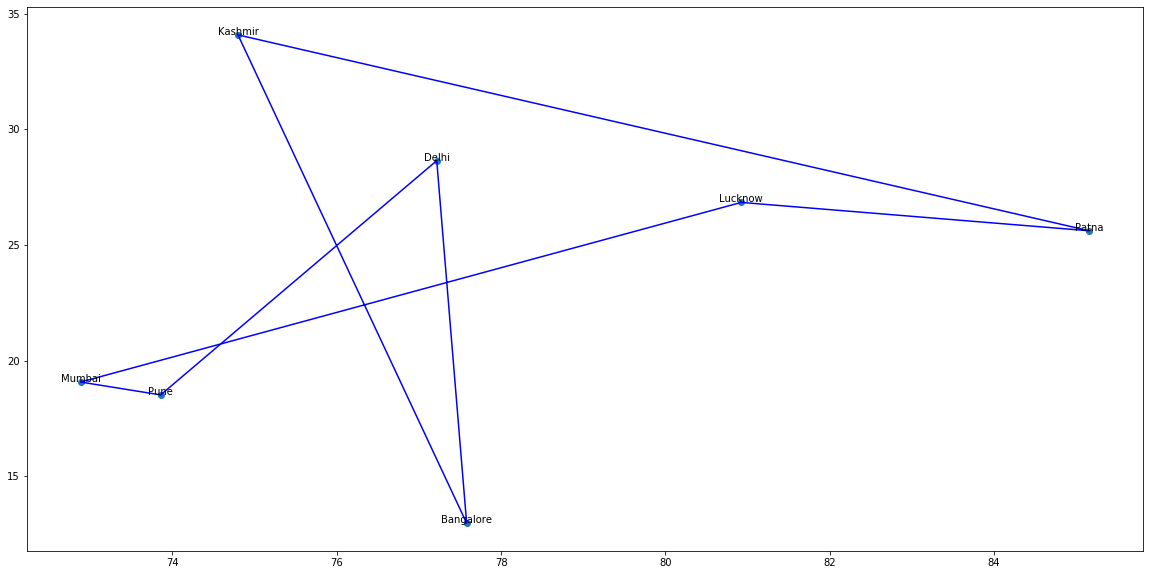

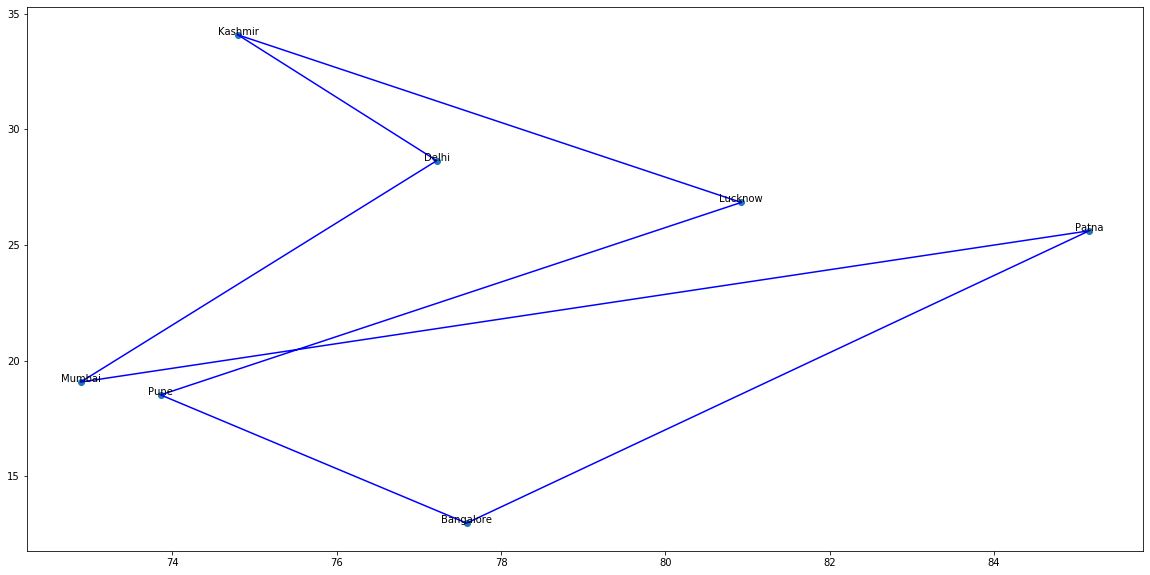

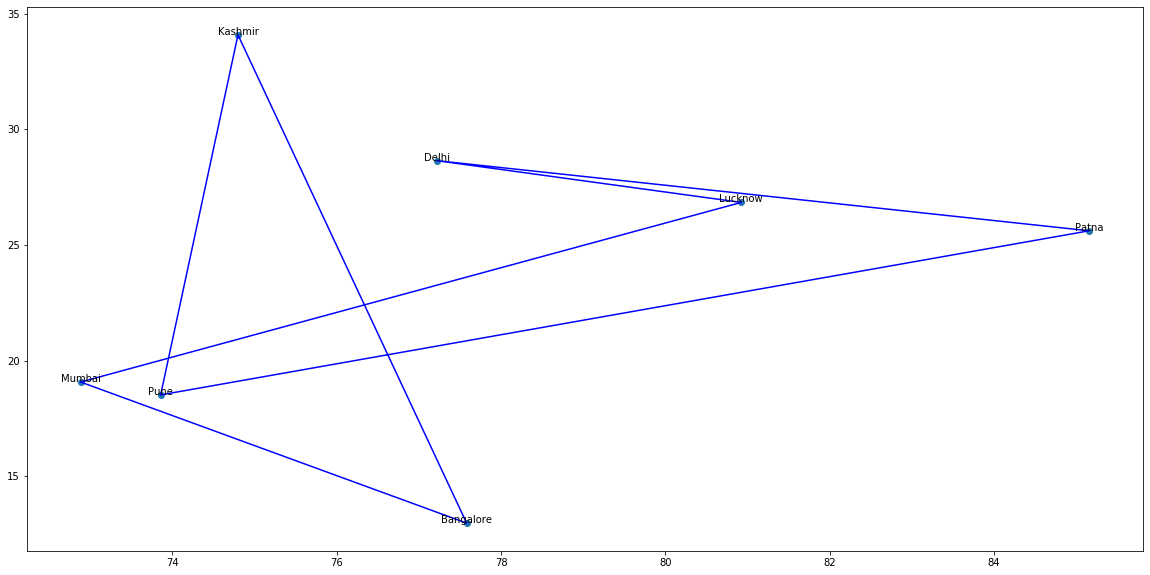

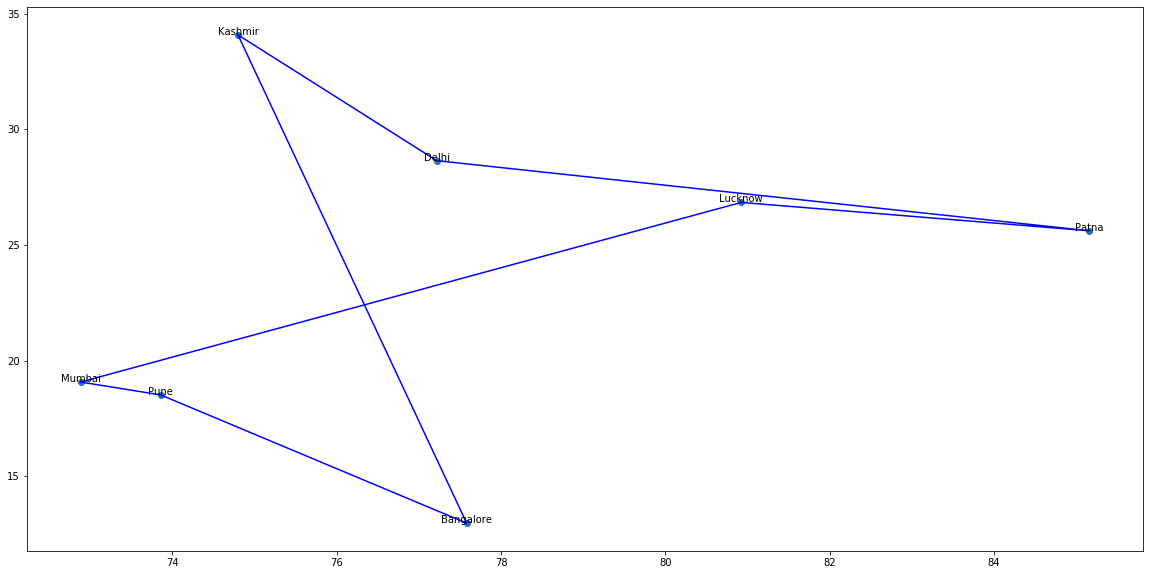

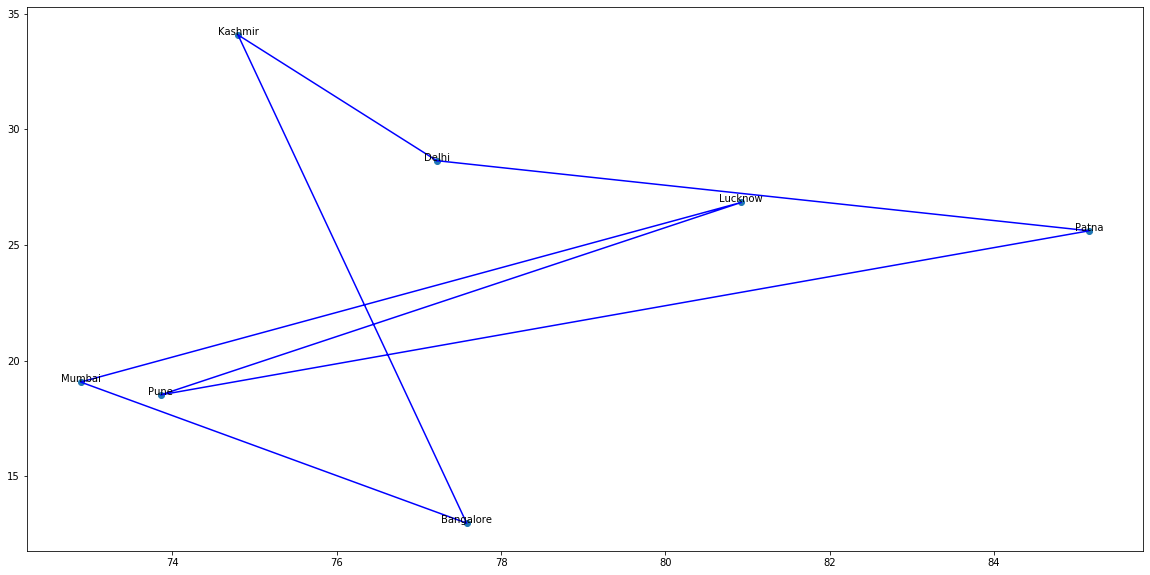

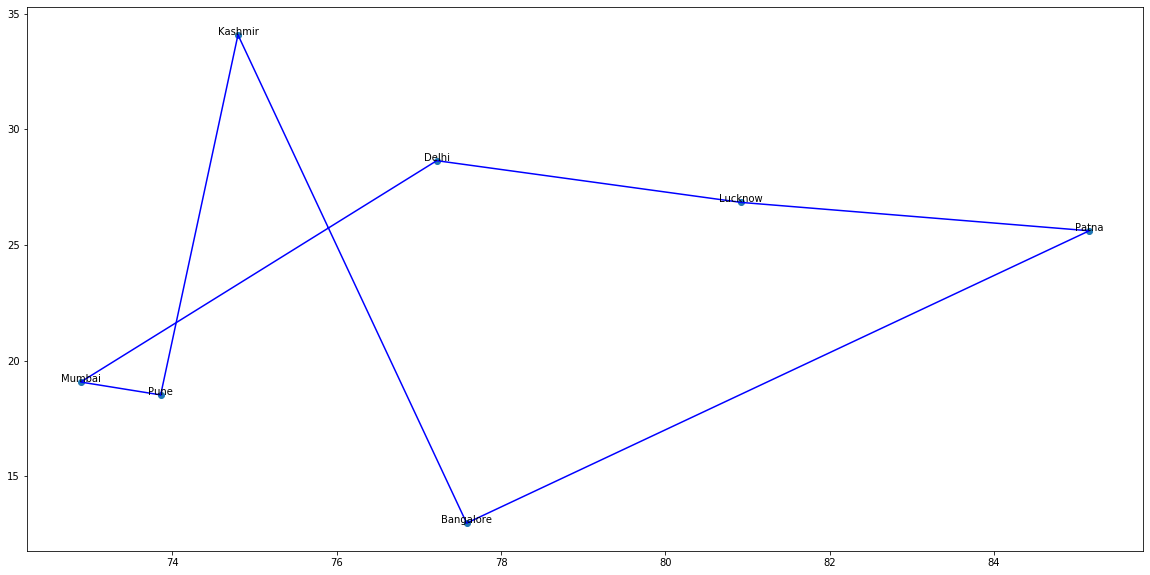

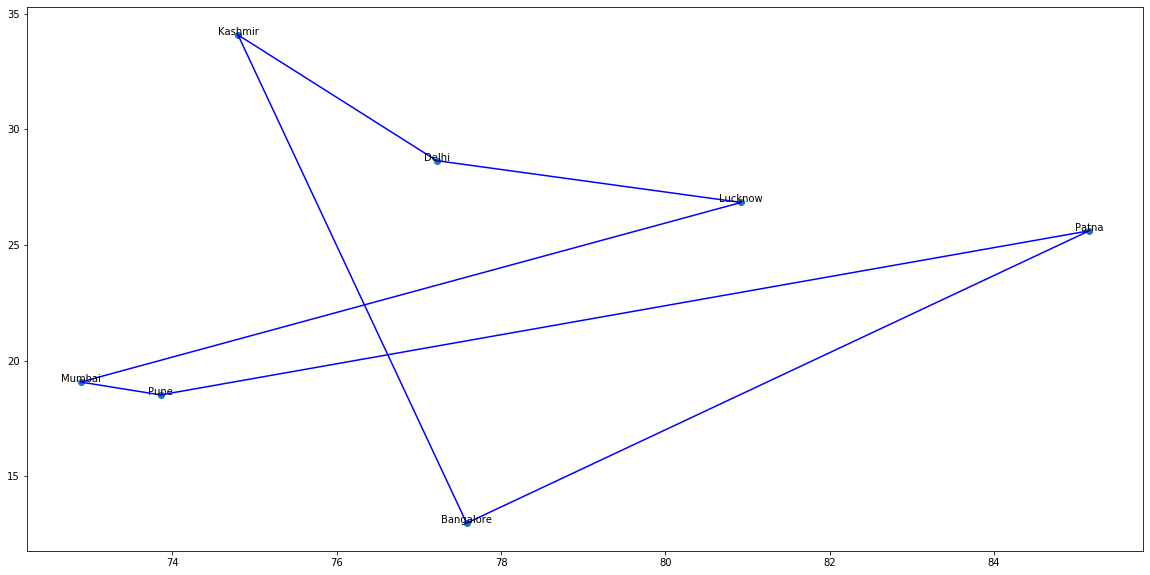

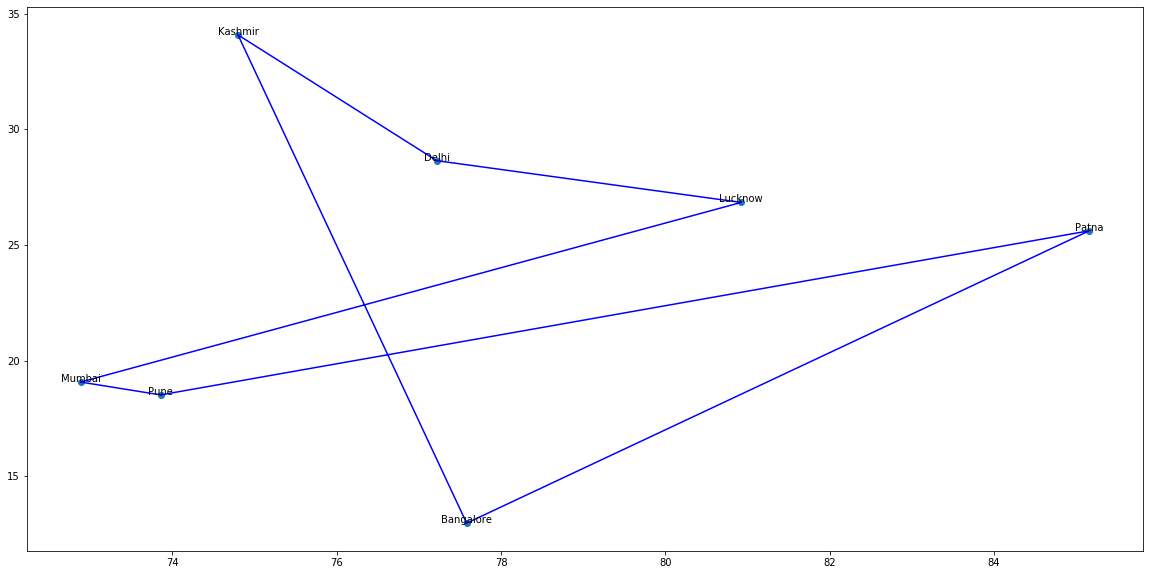

In [30]:
for pop_plot in population:
    plot_pop(pop_plot)

In [31]:
def path_fitness(cities):
    total_dis = total_distance(cities)
    fitness= 0.0
    if fitness == 0:
        fitness = 1 / float(total_dis)
    return fitness
path_fitness(cityList)

0.012917469560752097

In [32]:
def rankPathes(population):
    fitnessResults = {}
    for i in range(len(population)):
        fitnessResults[i] = path_fitness(population[i])
        
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)
rankPathes(population)

[(5, 0.01690992680267782),
 (8, 0.013936723852186165),
 (9, 0.013936723852186162),
 (7, 0.013929820792630826),
 (3, 0.013851955687350615),
 (2, 0.012864228910813971),
 (6, 0.0126758617398266),
 (1, 0.0124597917520985),
 (4, 0.012234297806017173),
 (0, 0.011046207672657826)]

In [33]:
def perform_selection(pop, eliteSize):
    #output = rankPathes(population)
    df = pd.DataFrame(np.array(pop), columns=["Index","Fitness"])
#A cumulative sum is a sequence of partial sums of a given sequence
    df['cumulative_sum'] = df.Fitness.cumsum()
#Cumulative percentage is another way of expressing frequency distribution. 
#It calculates the percentage of the cumulative frequency within each interval, much as relative frequency distribution calculates the percentage of frequency.
    df['cum_percentage'] = 100*df.cumulative_sum/df.Fitness.sum()
    selected_values = [pop[i][0] for i in range(eliteSize)]
    
    for i in range(len(pop) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(pop)):
            if pick <= df.iat[i,3]:
                selected_values.append(pop[i][0])
                break
                
    return selected_values

In [34]:
out11 = rankPathes(population)
selected_values = perform_selection(out11,5)
print(selected_values)

[5, 8, 9, 7, 3, 1, 3, 0, 2, 6]


In [35]:
def do_mating_pool(population, selected_values):
    matingpool = [population[selected_values[i]] for i in range(len(selected_values))]
    return matingpool
mp = do_mating_pool(population, selected_values)

In [36]:
def do_breed(first_parent, second_parent):
    generation_1= int(random.random() * len(first_parent))
    generation_2 = int(random.random() * len(second_parent))
    
    first_generation = min(generation_1, generation_2)
    last_generation = max(generation_1, generation_2)

    tot_parent1 = [first_parent[i] for i in range(first_generation, last_generation)]
    tot_parent2 = [i for i in second_parent if i not in tot_parent1]

    tot = tot_parent1 + tot_parent2
    return tot

In [37]:
def do_breed_population(my_mating_pool, eliteSize):
    ln = len(my_mating_pool) - eliteSize
    pl = random.sample(my_mating_pool, len(my_mating_pool))
    tot1 = [my_mating_pool[i] for i in range(eliteSize)]
    tot2 = [do_breed(pl[i], pl[len(my_mating_pool)-i-1]) for i in range(ln)]
    tot = tot1+tot2
    return tot
do_breed_population(mp,2)

[[[80.9231262, 26.8392792],
  [85.158875, 25.612677],
  [77.216721, 28.6448],
  [74.797371, 34.083656],
  [77.580643, 12.972442],
  [73.856255, 18.516726],
  [72.88261, 19.07283]],
 [[74.797371, 34.083656],
  [77.216721, 28.6448],
  [80.9231262, 26.8392792],
  [72.88261, 19.07283],
  [73.856255, 18.516726],
  [85.158875, 25.612677],
  [77.580643, 12.972442]],
 [[72.88261, 19.07283],
  [85.158875, 25.612677],
  [77.580643, 12.972442],
  [73.856255, 18.516726],
  [80.9231262, 26.8392792],
  [77.216721, 28.6448],
  [74.797371, 34.083656]],
 [[74.797371, 34.083656],
  [80.9231262, 26.8392792],
  [72.88261, 19.07283],
  [77.216721, 28.6448],
  [77.580643, 12.972442],
  [73.856255, 18.516726],
  [85.158875, 25.612677]],
 [[74.797371, 34.083656],
  [77.216721, 28.6448],
  [77.580643, 12.972442],
  [72.88261, 19.07283],
  [80.9231262, 26.8392792],
  [73.856255, 18.516726],
  [85.158875, 25.612677]],
 [[73.856255, 18.516726],
  [72.88261, 19.07283],
  [80.9231262, 26.8392792],
  [85.158875, 25.

### Mutation

In [39]:
def do_mutatation(indiv, mutat_rate):
    for exchanged in range(len(indiv)):
        if(random.random() < mutat_rate):
            exchanged_with = int(random.random() * len(indiv))
            
            city1 = indiv[exchanged]
            city2 = indiv[exchanged_with]
            
            indiv[exchanged] = city2
            indiv[exchanged_with] = city1
    return indiv

In [40]:
def do_mutatation_pop(population, mutat_rate):
    mutated_population = [do_mutatation(population[i], mutat_rate) for i in range(len(population))]
    return mutated_population
do_mutatation_pop(population, 0.01)

[[[77.580643, 12.972442],
  [77.216721, 28.6448],
  [72.88261, 19.07283],
  [80.9231262, 26.8392792],
  [74.797371, 34.083656],
  [73.856255, 18.516726],
  [85.158875, 25.612677]],
 [[74.797371, 34.083656],
  [80.9231262, 26.8392792],
  [72.88261, 19.07283],
  [77.216721, 28.6448],
  [77.580643, 12.972442],
  [73.856255, 18.516726],
  [85.158875, 25.612677]],
 [[73.856255, 18.516726],
  [72.88261, 19.07283],
  [80.9231262, 26.8392792],
  [85.158875, 25.612677],
  [74.797371, 34.083656],
  [77.580643, 12.972442],
  [77.216721, 28.6448]],
 [[74.797371, 34.083656],
  [77.216721, 28.6448],
  [72.88261, 19.07283],
  [85.158875, 25.612677],
  [77.580643, 12.972442],
  [73.856255, 18.516726],
  [80.9231262, 26.8392792]],
 [[80.9231262, 26.8392792],
  [77.216721, 28.6448],
  [85.158875, 25.612677],
  [73.856255, 18.516726],
  [74.797371, 34.083656],
  [77.580643, 12.972442],
  [72.88261, 19.07283]],
 [[80.9231262, 26.8392792],
  [85.158875, 25.612677],
  [77.216721, 28.6448],
  [74.797371, 34.

In [41]:
def get_following_gen(existing_gen, eliteSize, mutat_rate):
    pop = rankPathes(existing_gen)
    
    selected_values = perform_selection(pop, eliteSize)
   
    my_mating_pool = do_mating_pool(existing_gen, selected_values)
    tot = do_breed_population(my_mating_pool, eliteSize)
    following_gen = do_mutatation(tot, mutat_rate)
    #print(following_gen)
    return following_gen
get_following_gen(population, 5, 0.01)

[[[80.9231262, 26.8392792],
  [85.158875, 25.612677],
  [77.216721, 28.6448],
  [74.797371, 34.083656],
  [77.580643, 12.972442],
  [73.856255, 18.516726],
  [72.88261, 19.07283]],
 [[74.797371, 34.083656],
  [77.216721, 28.6448],
  [80.9231262, 26.8392792],
  [72.88261, 19.07283],
  [73.856255, 18.516726],
  [85.158875, 25.612677],
  [77.580643, 12.972442]],
 [[72.88261, 19.07283],
  [80.9231262, 26.8392792],
  [77.216721, 28.6448],
  [74.797371, 34.083656],
  [77.580643, 12.972442],
  [85.158875, 25.612677],
  [73.856255, 18.516726]],
 [[73.856255, 18.516726],
  [72.88261, 19.07283],
  [77.216721, 28.6448],
  [80.9231262, 26.8392792],
  [85.158875, 25.612677],
  [77.580643, 12.972442],
  [74.797371, 34.083656]],
 [[74.797371, 34.083656],
  [77.216721, 28.6448],
  [72.88261, 19.07283],
  [85.158875, 25.612677],
  [77.580643, 12.972442],
  [73.856255, 18.516726],
  [80.9231262, 26.8392792]],
 [[74.797371, 34.083656],
  [77.216721, 28.6448],
  [80.9231262, 26.8392792],
  [72.88261, 19.0

In [42]:
#cityList  =  [[77.580643,12.972442],[72.88261,19.07283],[77.216721,28.644800],[73.856255,18.516726]
             #,[85.158875,25.612677],[80.9231262,26.8392792],[74.797371,34.083656]]  
#city_names =['Bangalore', 'Mumbai', 'Delhi', 'Pune','Patna','Lucknow','Kashmir']
def get_names(result_lst, cities, name_lst):
    names = []
    for index,value in enumerate(result_lst):
        for i,v in enumerate(cities):
            if value == v:
                names.append(name_lst[i])
    return names

### Genetic Algorithm

Incipient distance: 56.06051822489468
Eventual distance: 52.15592519829276
[(0, 'Delhi'), (1, 'Kashmir'), (2, 'Mumbai'), (3, 'Pune'), (4, 'Bangalore'), (5, 'Patna'), (6, 'Lucknow')]


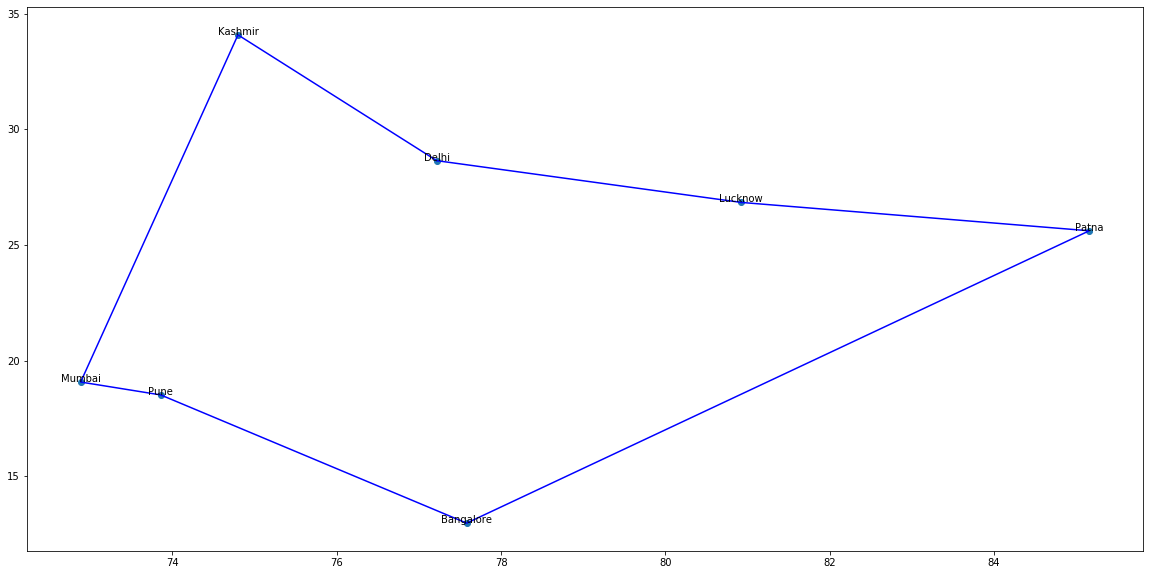

In [43]:
def GA(city_names,cities, population_size, eliteSize, mutat_rate, generations):
    population = initialPopulation(cities,population_size)
    #print(population_)
    print("Incipient distance: " + str(1 / rankPathes(population)[0][1]))
    for i in range(generations):
        population = get_following_gen(population, eliteSize, mutat_rate)
        #print(population)
    
    print("Eventual distance: " + str(1 / rankPathes(population)[0][1]))
    optimal_route_id = rankPathes(population)[0][0]
    optimal_route = population[optimal_route_id]
    ordered_cities = get_names(optimal_route,cities,city_names)
    print([(indx,val) for indx,val in enumerate(ordered_cities)])
    plot_pop(optimal_route)
    return optimal_route

result_lst = GA(city_names,cityList, population_size=100, 
                 eliteSize=5, mutat_rate=0.01, 
                 generations=500)

In [44]:
print(result_lst)

[[77.216721, 28.6448], [74.797371, 34.083656], [72.88261, 19.07283], [73.856255, 18.516726], [77.580643, 12.972442], [85.158875, 25.612677], [80.9231262, 26.8392792]]
